[[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8e90651280>]]


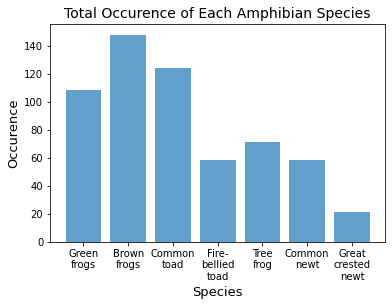

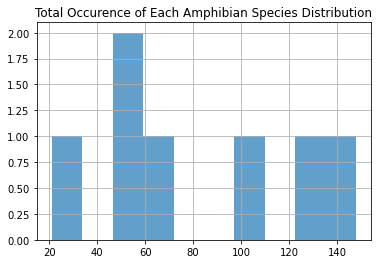

In [170]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display
import warnings
from mpl_toolkits.mplot3d import Axes3D

warnings.filterwarnings('ignore')

def addition(s): 
    return s.replace(" ", "\n").replace("-", "-\n")

mainDF = pd.read_csv("dataset.csv", delimiter=";", skiprows = 1) 
mainDF = mainDF.drop(columns = ['ID', 'Motorway'])
amphibian =  mainDF.iloc[:, -7:]
amphibianCount = (amphibian == 1).sum()

#colorMap = ['mediumseagreen', 'sandybrown', 'forestgreen', 'salmon', 'darkgreen',  'turquoise', 'teal']
#colorMap = ['b', 'g', 'c', 'r', 'm',  'y', 'w']
colorMap = ['turquoise', 'forestgreen',  'mediumpurple', 'deeppink', 'salmon', 'orange', 'gold']

plt.title('Total Occurence of Each Amphibian Species', fontsize = 14)
plt.ylabel('Occurence', fontsize = 13)
plt.xlabel('Species', fontsize = 13)
newLineName = list(map(addition, amphibian.columns))
plt.bar(newLineName, amphibianCount, alpha = 0.7)

print((pd.DataFrame({"Total Occurence of Each Amphibian Species Distribution" : amphibianCount})).hist(alpha=0.7))

In [171]:
site  = mainDF.iloc[:, 0:14]
pondNum = site.loc[:, ["SR", "NR"]]
pondNumAnal = pd.DataFrame({"Mean": pondNum.mean(), "Standard Deviation": pondNum.std()})
renameColumn = pondNumAnal.reset_index()['index'].replace('SR', 'Reservoirs\' Surface').replace('NR', 'Number of Reservoir')
pondNumAnal = pondNumAnal.reset_index()
pondNumAnal['Attribute'] = renameColumn
pondNumAnal.drop('index',  axis = 1, inplace=True)
pondNumAnal.set_index('Attribute', inplace = True)
display(pondNumAnal)

,Mean,Standard Deviation
Attribute,,
Reservoirs' Surface,9633.227513,46256.078309
Number of Reservoir,1.566138,1.544419


In [172]:
distanceNum = site.loc[:, ["RR", "BR"]]
distanceAnal = pd.DataFrame({"Mean": distanceNum.mean(), "Standard Deviation": distanceNum.std()})
renameColumn = distanceAnal.reset_index()['index'].replace('RR', 'Min Distance to Building').replace('BR', 'Min Distance to Road')
distanceAnal = distanceAnal.reset_index()
distanceAnal['Attribute'] = renameColumn
distanceAnal.drop('index',  axis = 1, inplace=True)
distanceAnal.set_index('Attribute', inplace = True)
display(distanceAnal)

,Mean,Standard Deviation
Attribute,,
Min Distance to Building,2.333333,2.520132
Min Distance to Road,2.502646,2.640971


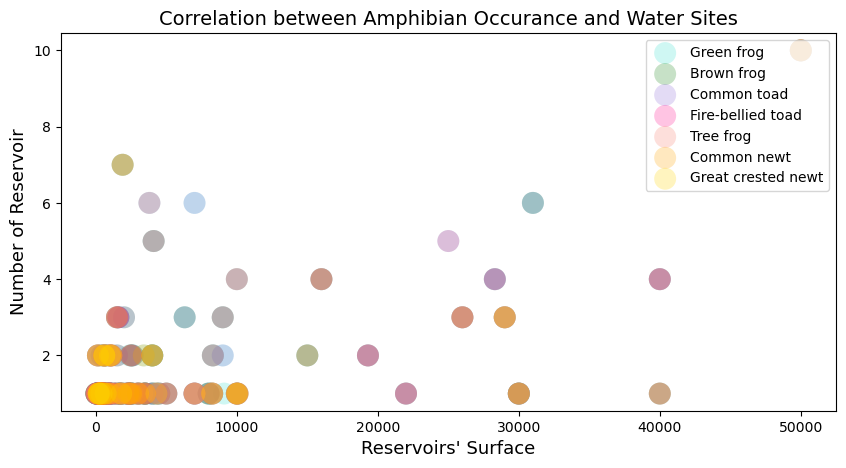

In [173]:
pondNumWithoutOutLiner = pondNum[pondNum['SR'] < 80000]

gfCol = (pondNumWithoutOutLiner[amphibian['Green frogs'] == 1])
gfData = (list(gfCol.SR), list(gfCol.NR))

bfCol = (pondNumWithoutOutLiner[amphibian['Brown frogs'] == 1])
bfData = (list(bfCol.SR), list(bfCol.NR))

ctCol = (pondNumWithoutOutLiner[amphibian['Common toad'] == 1])
ctData = (list(ctCol.SR), list(ctCol.NR))

ftCol = (pondNumWithoutOutLiner[amphibian['Fire-bellied toad'] == 1])
ftData = (list(ftCol.SR), list(ftCol.NR))

tfCol = (pondNumWithoutOutLiner[amphibian['Tree frog'] == 1])
tfData = (list(tfCol.SR), list(tfCol.NR))

cnCol = (pondNumWithoutOutLiner[amphibian['Common newt'] == 1])
cnData = (list(cnCol.SR), list(cnCol.NR))

gnCol = (pondNumWithoutOutLiner[amphibian['Great crested newt'] == 1])
gnData = (list(gnCol.SR), list(gnCol.NR))

data = (gfData, bfData, ctData, ftData, tfData, cnData, gnData)
group = ("Green frog", "Brown frog", "Common toad", "Fire-bellied toad", "Tree frog", "Common newt", "Great crested newt")

fig = plt.figure(figsize=(10,5), dpi= 100)
ax = fig.add_subplot(1, 1, 1)

for data, color, group in zip(data, colorMap, group):
    x, y = data
    ax.scatter(x, y, alpha=0.25, c=color, edgecolors='none', s=250, label = group)

plt.title('Correlation between Amphibian Occurance and Water Sites', fontsize = 14)
plt.ylabel('Number of Reservoir', fontsize = 13)
plt.xlabel('Reservoirs\' Surface', fontsize = 13)

plt.legend(loc=1)

Text(0.5, 0, 'Min Distance to Road')

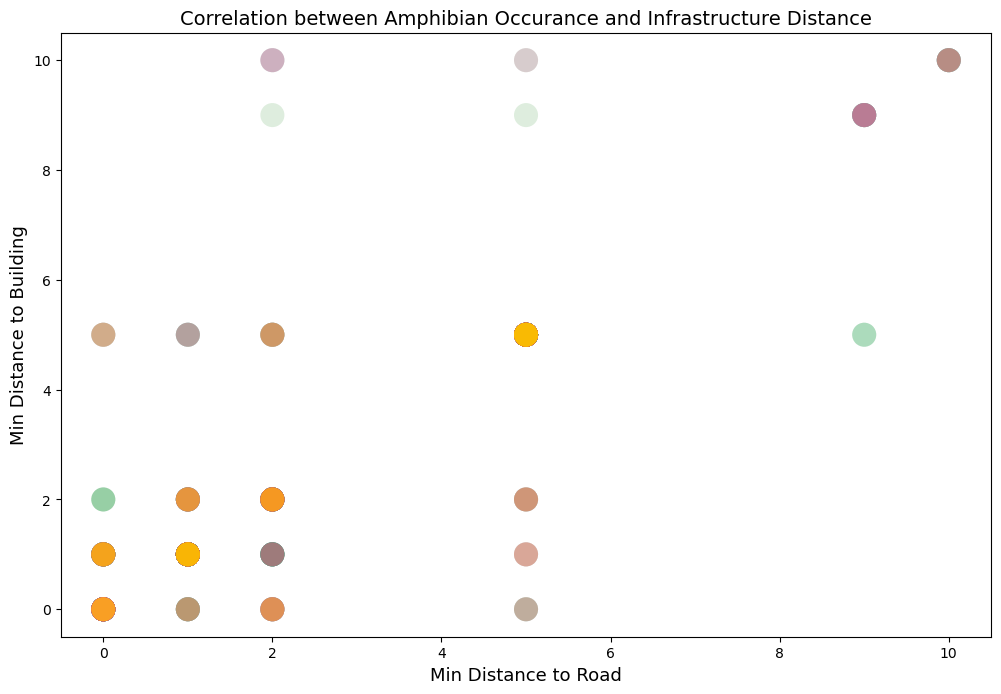

In [174]:
distanceNumWithoutOutLiner = distanceNum

gfCol = (distanceNumWithoutOutLiner[amphibian['Green frogs'] == 1])
gfData = (list(gfCol.RR), list(gfCol.BR))

bfCol = (distanceNumWithoutOutLiner[amphibian['Brown frogs'] == 1])
bfData = (list(bfCol.RR), list(bfCol.BR))

ctCol = (distanceNumWithoutOutLiner[amphibian['Common toad'] == 1])
ctData = (list(ctCol.RR), list(ctCol.BR))

ftCol = (distanceNumWithoutOutLiner[amphibian['Fire-bellied toad'] == 1])
ftData = (list(ftCol.RR), list(ftCol.BR))

tfCol = (distanceNumWithoutOutLiner[amphibian['Tree frog'] == 1])
tfData = (list(tfCol.RR), list(tfCol.BR))

cnCol = (distanceNumWithoutOutLiner[amphibian['Common newt'] == 1])
cnData = (list(cnCol.RR), list(cnCol.BR))

gnCol = (distanceNumWithoutOutLiner[amphibian['Great crested newt'] == 1])
gnData = (list(gnCol.RR), list(gnCol.BR))

data = (gfData, bfData, ctData, ftData, tfData, cnData, gnData)
group = ("Green frog", "Brown frog", "Common toad", "Fire-bellied toad", "Tree frog", "Common newt", "Great crested newt")

fig = plt.figure(figsize=(12,8), dpi= 100)
ax = fig.add_subplot(1, 1, 1)

for data, color, group in zip(data, colorMap, group):
    x, y = data
    ax.scatter(x, y, alpha=0.15, c=color, edgecolors='none', s=300, label = group)

plt.title('Correlation between Amphibian Occurance and Infrastructure Distance', fontsize = 14)
plt.ylabel('Min Distance to Building', fontsize = 13)
plt.xlabel('Min Distance to Road', fontsize = 13)

#plt.legend(loc=1)

Text(0.5, 0, 'Fishing Frequency')

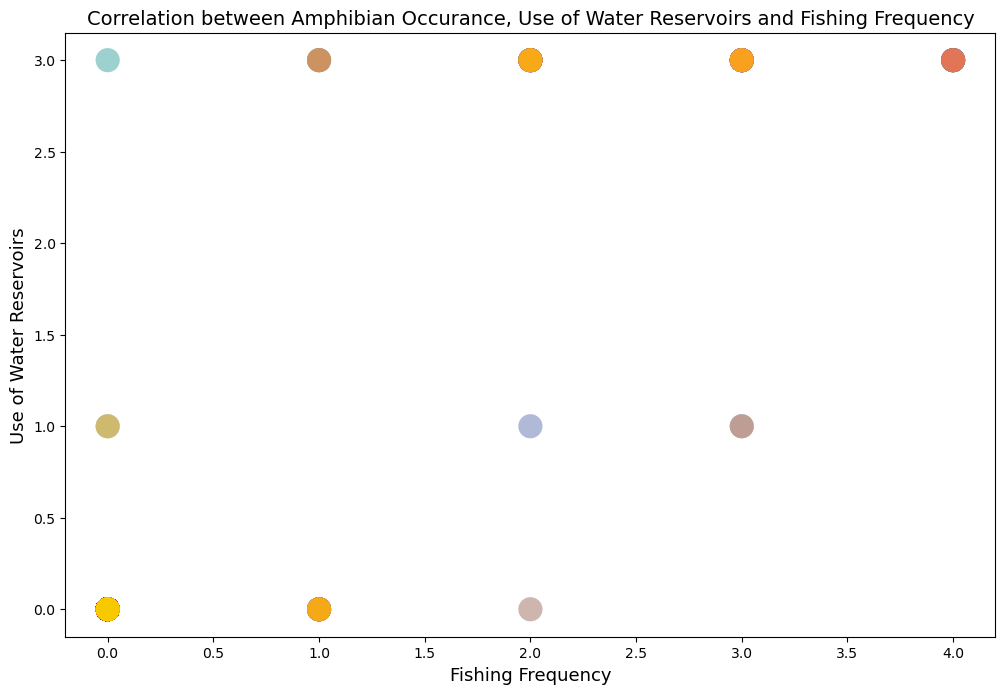

In [175]:
gfCol = (mainDF[amphibian['Green frogs'] == 1])
gfData = (list(gfCol.FR), list(gfCol.UR))

bfCol = (mainDF[amphibian['Brown frogs'] == 1])
bfData = (list(bfCol.FR), list(bfCol.UR))

ctCol = (mainDF[amphibian['Common toad'] == 1])
ctData = (list(ctCol.FR), list(ctCol.UR))

ftCol = (mainDF[amphibian['Fire-bellied toad'] == 1])
ftData = (list(ftCol.FR), list(ftCol.UR))

tfCol = (mainDF[amphibian['Tree frog'] == 1])
tfData = (list(tfCol.FR), list(tfCol.UR))

cnCol = (mainDF[amphibian['Common newt'] == 1])
cnData = (list(cnCol.FR), list(cnCol.UR))

gnCol = (mainDF[amphibian['Great crested newt'] == 1])
gnData = (list(gnCol.FR), list(gnCol.UR))

data = (gfData, bfData, ctData, ftData, tfData, cnData, gnData)
group = ("Green frog", "URown frog", "Common toad", "Fire-bellied toad", "Tree frog", "Common newt", "Great crested newt")

fig = plt.figure(figsize=(12,8), dpi= 100)
ax = fig.add_subplot(1, 1, 1)

for data, color, group in zip(data, colorMap, group):
    x, y = data
    ax.scatter(x, y, alpha=0.15, c=color, edgecolors='none', s=300, label = group)

plt.title('Correlation between Amphibian Occurance, Use of Water Reservoirs and Fishing Frequency', fontsize = 14)
plt.ylabel('Use of Water Reservoirs', fontsize = 13)
plt.xlabel('Fishing Frequency', fontsize = 13)

#plt.legend(loc=1)

Text(0.5, 0, 'Access from Edges to Undeveloped Areas')

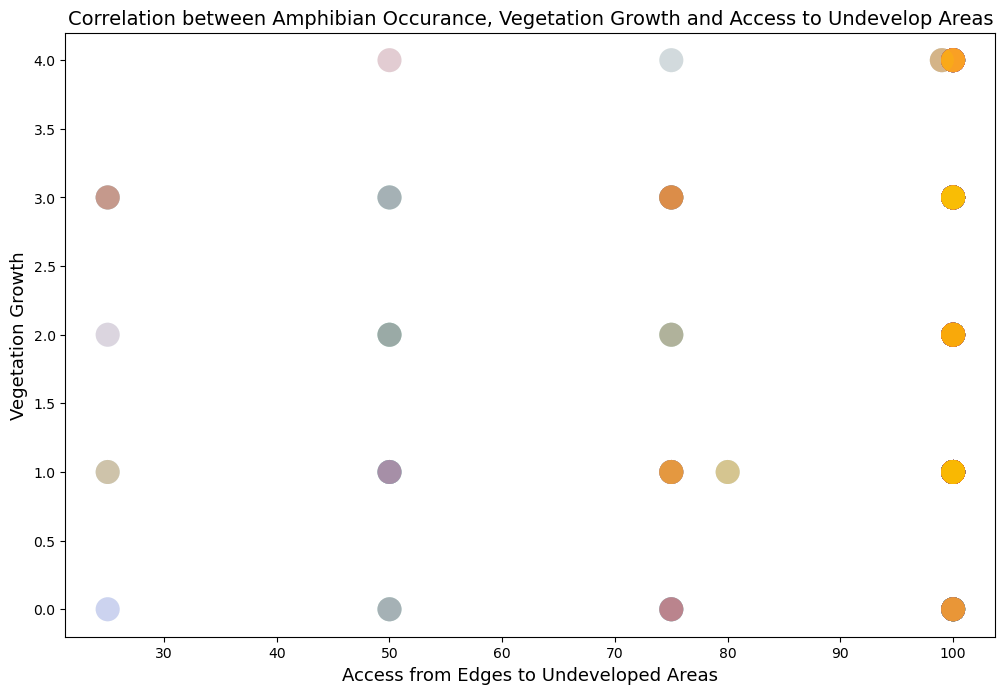

In [176]:
gfCol = (mainDF[amphibian['Green frogs'] == 1])
gfData = (list(gfCol.OR), list(gfCol.VR))

bfCol = (mainDF[amphibian['Brown frogs'] == 1])
bfData = (list(bfCol.OR), list(bfCol.VR))

ctCol = (mainDF[amphibian['Common toad'] == 1])
ctData = (list(ctCol.OR), list(ctCol.VR))

ftCol = (mainDF[amphibian['Fire-bellied toad'] == 1])
ftData = (list(ftCol.OR), list(ftCol.VR))

tfCol = (mainDF[amphibian['Tree frog'] == 1])
tfData = (list(tfCol.OR), list(tfCol.VR))

cnCol = (mainDF[amphibian['Common newt'] == 1])
cnData = (list(cnCol.OR), list(cnCol.VR))

gnCol = (mainDF[amphibian['Great crested newt'] == 1])
gnData = (list(gnCol.OR), list(gnCol.VR))

data = (gfData, bfData, ctData, ftData, tfData, cnData, gnData)
group = ("Green frog", "BRown frog", "Common toad", "Fire-bellied toad", "Tree frog", "Common newt", "Great crested newt")

fig = plt.figure(figsize=(12,8), dpi= 100)
ax = fig.add_subplot(1, 1, 1)

for data, color, group in zip(data, colorMap, group):
    x, y = data
    ax.scatter(x, y, alpha=0.15, c=color, edgecolors='none', s=300, label = group)

plt.title('Correlation between Amphibian Occurance, Vegetation Growth and Access to Undevelop Areas', fontsize = 14)
plt.ylabel('Vegetation Growth', fontsize = 13)
plt.xlabel('Access from Edges to Undeveloped Areas', fontsize = 13)

#plt.legend(loc=0)

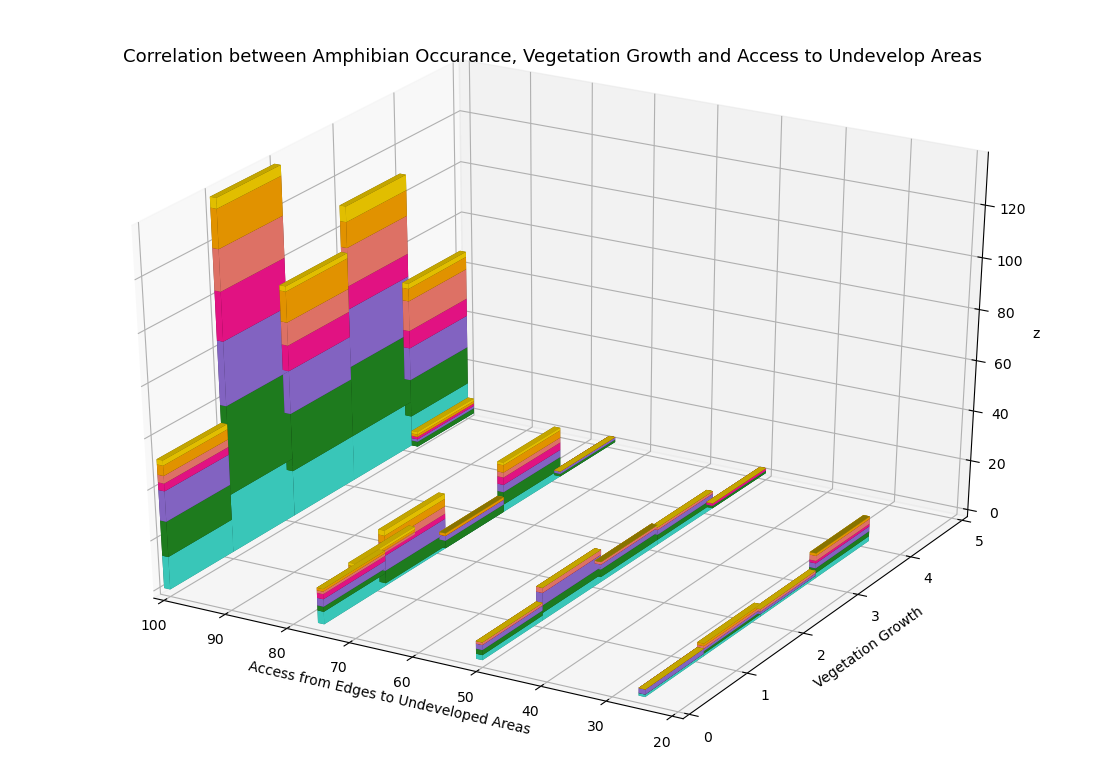

In [177]:
pair = []
xpos = []
ypos =  []
dx = np.ones(9)
dy = np.ones(9)
dz = []
encode = {}


gfCol = (mainDF[amphibian['Green frogs'] == 1])
gfData = (list(gfCol.OR), list(gfCol.VR))

for i in range(len(gfData[0])):
    if(str(gfData[0][i]) + str(gfData[1][i]) not in pair):
        xpos.append(gfData[0][i])
        ypos.append(gfData[1][i])
        pair.append(str(gfData[0][i]) + str(gfData[1][i]))
        encode[str(gfData[0][i]) + str(gfData[1][i])] = len(encode)
        
bfCol = (mainDF[amphibian['Brown frogs'] == 1])
bfData = (list(bfCol.OR), list(bfCol.VR))

for i in range(len(bfData[0])):
    if(str(bfData[0][i]) + str(bfData[1][i]) not in pair):
        xpos.append(bfData[0][i])
        ypos.append(bfData[1][i])
        pair.append(str(bfData[0][i]) + str(bfData[1][i]))
        encode[str(bfData[0][i]) + str(bfData[1][i])] = len(encode)

ctCol = (mainDF[amphibian['Common toad'] == 1])
ctData = (list(ctCol.OR), list(ctCol.VR))

for i in range(len(ctData[0])):
    if(str(ctData[0][i]) + str(ctData[1][i]) not in pair):
        xpos.append(ctData[0][i])
        ypos.append(ctData[1][i])
        pair.append(str(ctData[0][i]) + str(ctData[1][i]))
        encode[str(ctData[0][i]) + str(ctData[1][i])] = len(encode)

ftCol = (mainDF[amphibian['Fire-bellied toad'] == 1])
ftData = (list(ftCol.OR), list(ftCol.VR))

for i in range(len(ftData[0])):
    if(str(ftData[0][i]) + str(ftData[1][i]) not in pair):
        xpos.append(ftData[0][i])
        ypos.append(ftData[1][i])
        pair.append(str(ftData[0][i]) + str(ftData[1][i]))
        encode[str(ftData[0][i]) + str(ftData[1][i])] = len(encode)

tfCol = (mainDF[amphibian['Tree frog'] == 1])
tfData = (list(tfCol.OR), list(tfCol.VR))

for i in range(len(tfData[0])):
    if(str(tfData[0][i]) + str(tfData[1][i]) not in pair):
        xpos.append(tfData[0][i])
        ypos.append(tfData[1][i])
        pair.append(str(tfData[0][i]) + str(tfData[1][i]))
        encode[str(tfData[0][i]) + str(tfData[1][i])] = len(encode)

cnCol = (mainDF[amphibian['Common newt'] == 1])
cnData = (list(cnCol.OR), list(cnCol.VR))

for i in range(len(cnData[0])):
    if(str(cnData[0][i]) + str(cnData[1][i]) not in pair):
        xpos.append(cnData[0][i])
        ypos.append(cnData[1][i])
        pair.append(str(cnData[0][i]) + str(cnData[1][i]))
        encode[str(cnData[0][i]) + str(cnData[1][i])] = len(encode)

gnCol = (mainDF[amphibian['Great crested newt'] == 1])
gnData = (list(gnCol.OR), list(gnCol.VR))

for i in range(len(gnData[0])):
    if(str(gnData[0][i]) + str(gnData[1][i]) not in pair):
        xpos.append(gnData[0][i])
        ypos.append(gnData[1][i])
        pair.append(str(gnData[0][i]) + str(gnData[1][i]))
        encode[str(gnData[0][i]) + str(gnData[1][i])] = len(encode)

data = (gfData, bfData, ctData, ftData, tfData, cnData, gnData)
group = ("Green frog", "Brown frog", "Common toad", "Fire-bellied toad", "Tree frog", "Common newt", "Great crested newt")

zpos = np.zeros(len(xpos))

dx = np.ones(len(xpos))
dy = np.ones(len(xpos))
dz = [np.zeros(len(xpos)) for i in range(7)]

for i in range(len(gfData[0])):
    dz[0][encode[str(gfData[0][i]) + str(gfData[1][i])]] += 1

for i in range(len(bfData[0])):
    dz[1][encode[str(bfData[0][i]) + str(bfData[1][i])]] += 1

for i in range(len(ctData[0])):
    dz[2][encode[str(ctData[0][i]) + str(ctData[1][i])]] += 1

for i in range(len(ftData[0])):
    dz[3][encode[str(ftData[0][i]) + str(ftData[1][i])]] += 1
    
for i in range(len(tfData[0])):
    dz[4][encode[str(tfData[0][i]) + str(tfData[1][i])]] += 1
    
for i in range(len(cnData[0])):
    dz[5][encode[str(cnData[0][i]) + str(cnData[1][i])]] += 1
    
for i in range(len(gnData[0])):
    dz[6][encode[str(gnData[0][i]) + str(gnData[1][i])]] += 1

fig = plt.figure(figsize=(14,10), dpi= 100)
ax = fig.add_subplot(111, projection = "3d")

ax.set_xlabel("x")
ax.set_ylabel("y") 
ax.set_zlabel("z")
ax.set_xlim3d(20,100)
ax.set_ylim3d(0,5) 

_zpos = zpos

for i in range(7):
    ax.bar3d(xpos, ypos, _zpos, dx, dy, dz[i], color=colorMap[i])
    _zpos += dz[i]    
    
plt.title('Correlation between Amphibian Occurance, Vegetation Growth and Access to Undevelop Areas', fontsize = 13)
plt.ylabel('Vegetation Growth', fontsize = 10)
plt.xlabel('Access from Edges to Undeveloped Areas', fontsize = 10)
plt.gca().invert_xaxis()
#plt.legend(loc=0)

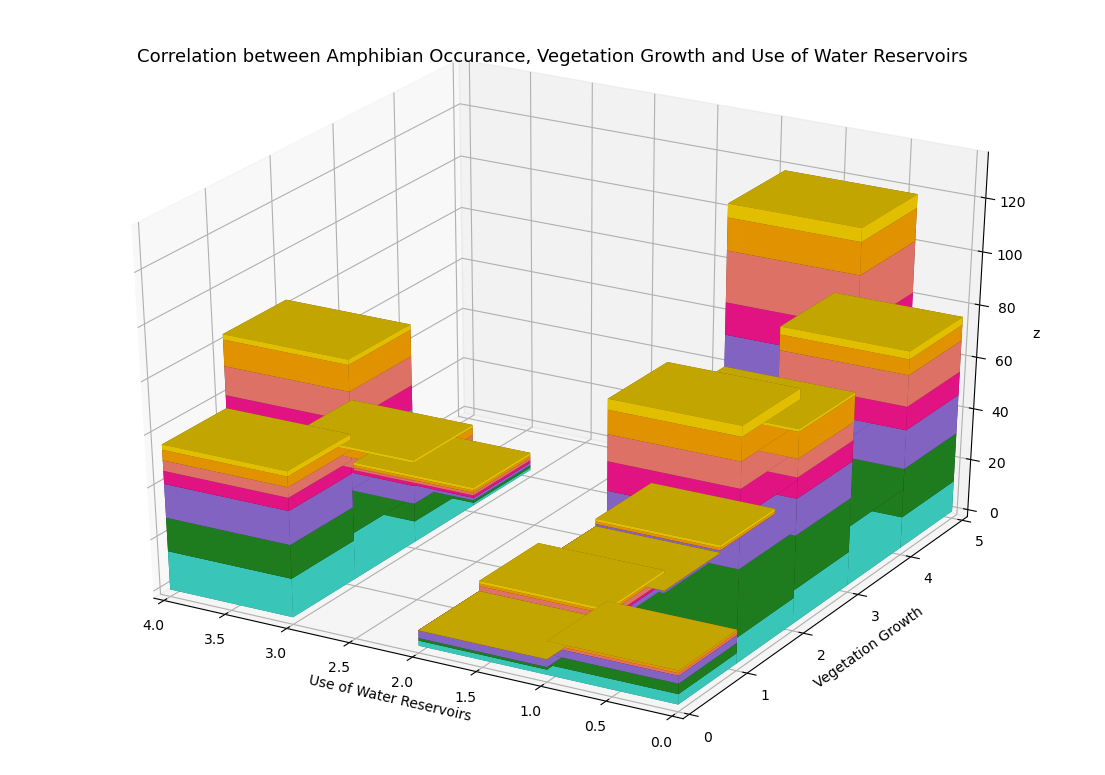

In [178]:
pair = []
xpos = []
ypos =  []
dx = np.ones(9)
dy = np.ones(9)
dz = []
encode = {}


gfCol = (mainDF[amphibian['Green frogs'] == 1])
gfData = (list(gfCol.UR), list(gfCol.VR))

for i in range(len(gfData[0])):
    if(str(gfData[0][i]) + str(gfData[1][i]) not in pair):
        xpos.append(gfData[0][i])
        ypos.append(gfData[1][i])
        pair.append(str(gfData[0][i]) + str(gfData[1][i]))
        encode[str(gfData[0][i]) + str(gfData[1][i])] = len(encode)
        
bfCol = (mainDF[amphibian['Brown frogs'] == 1])
bfData = (list(bfCol.UR), list(bfCol.VR))

for i in range(len(bfData[0])):
    if(str(bfData[0][i]) + str(bfData[1][i]) not in pair):
        xpos.append(bfData[0][i])
        ypos.append(bfData[1][i])
        pair.append(str(bfData[0][i]) + str(bfData[1][i]))
        encode[str(bfData[0][i]) + str(bfData[1][i])] = len(encode)

ctCol = (mainDF[amphibian['Common toad'] == 1])
ctData = (list(ctCol.UR), list(ctCol.VR))

for i in range(len(ctData[0])):
    if(str(ctData[0][i]) + str(ctData[1][i]) not in pair):
        xpos.append(ctData[0][i])
        ypos.append(ctData[1][i])
        pair.append(str(ctData[0][i]) + str(ctData[1][i]))
        encode[str(ctData[0][i]) + str(ctData[1][i])] = len(encode)

ftCol = (mainDF[amphibian['Fire-bellied toad'] == 1])
ftData = (list(ftCol.UR), list(ftCol.VR))

for i in range(len(ftData[0])):
    if(str(ftData[0][i]) + str(ftData[1][i]) not in pair):
        xpos.append(ftData[0][i])
        ypos.append(ftData[1][i])
        pair.append(str(ftData[0][i]) + str(ftData[1][i]))
        encode[str(ftData[0][i]) + str(ftData[1][i])] = len(encode)

tfCol = (mainDF[amphibian['Tree frog'] == 1])
tfData = (list(tfCol.UR), list(tfCol.VR))

for i in range(len(tfData[0])):
    if(str(tfData[0][i]) + str(tfData[1][i]) not in pair):
        xpos.append(tfData[0][i])
        ypos.append(tfData[1][i])
        pair.append(str(tfData[0][i]) + str(tfData[1][i]))
        encode[str(tfData[0][i]) + str(tfData[1][i])] = len(encode)

cnCol = (mainDF[amphibian['Common newt'] == 1])
cnData = (list(cnCol.UR), list(cnCol.VR))

for i in range(len(cnData[0])):
    if(str(cnData[0][i]) + str(cnData[1][i]) not in pair):
        xpos.append(cnData[0][i])
        ypos.append(cnData[1][i])
        pair.append(str(cnData[0][i]) + str(cnData[1][i]))
        encode[str(cnData[0][i]) + str(cnData[1][i])] = len(encode)

gnCol = (mainDF[amphibian['Great crested newt'] == 1])
gnData = (list(gnCol.UR), list(gnCol.VR))

for i in range(len(gnData[0])):
    if(str(gnData[0][i]) + str(gnData[1][i]) not in pair):
        xpos.append(gnData[0][i])
        ypos.append(gnData[1][i])
        pair.append(str(gnData[0][i]) + str(gnData[1][i]))
        encode[str(gnData[0][i]) + str(gnData[1][i])] = len(encode)

data = (gfData, bfData, ctData, ftData, tfData, cnData, gnData)
group = ("Green frog", "Brown frog", "Common toad", "Fire-bellied toad", "Tree frog", "Common newt", "Great crested newt")

zpos = np.zeros(len(xpos))

dx = np.ones(len(xpos))
dy = np.ones(len(xpos))
dz = [np.zeros(len(xpos)) for i in range(7)]

for i in range(len(gfData[0])):
    dz[0][encode[str(gfData[0][i]) + str(gfData[1][i])]] += 1

for i in range(len(bfData[0])):
    dz[1][encode[str(bfData[0][i]) + str(bfData[1][i])]] += 1

for i in range(len(ctData[0])):
    dz[2][encode[str(ctData[0][i]) + str(ctData[1][i])]] += 1

for i in range(len(ftData[0])):
    dz[3][encode[str(ftData[0][i]) + str(ftData[1][i])]] += 1
    
for i in range(len(tfData[0])):
    dz[4][encode[str(tfData[0][i]) + str(tfData[1][i])]] += 1
    
for i in range(len(cnData[0])):
    dz[5][encode[str(cnData[0][i]) + str(cnData[1][i])]] += 1
    
for i in range(len(gnData[0])):
    dz[6][encode[str(gnData[0][i]) + str(gnData[1][i])]] += 1

fig = plt.figure(figsize=(14,10), dpi= 100)
ax = fig.add_subplot(111, projection = "3d")

ax.set_xlabel("x")
ax.set_ylabel("y") 
ax.set_zlabel("z")
ax.set_xlim3d(0,4)
ax.set_ylim3d(0,5) 

_zpos = zpos

for i in range(7):
    ax.bar3d(xpos, ypos, _zpos, dx, dy, dz[i], color=colorMap[i])
    _zpos += dz[i]    
    
plt.title('Correlation between Amphibian Occurance, Vegetation Growth and Use of Water Reservoirs', fontsize = 13)
plt.ylabel('Vegetation Growth', fontsize = 10)
plt.xlabel('Use of Water Reservoirs', fontsize = 10)
plt.gca().invert_xaxis()
#plt.legend(loc=0)

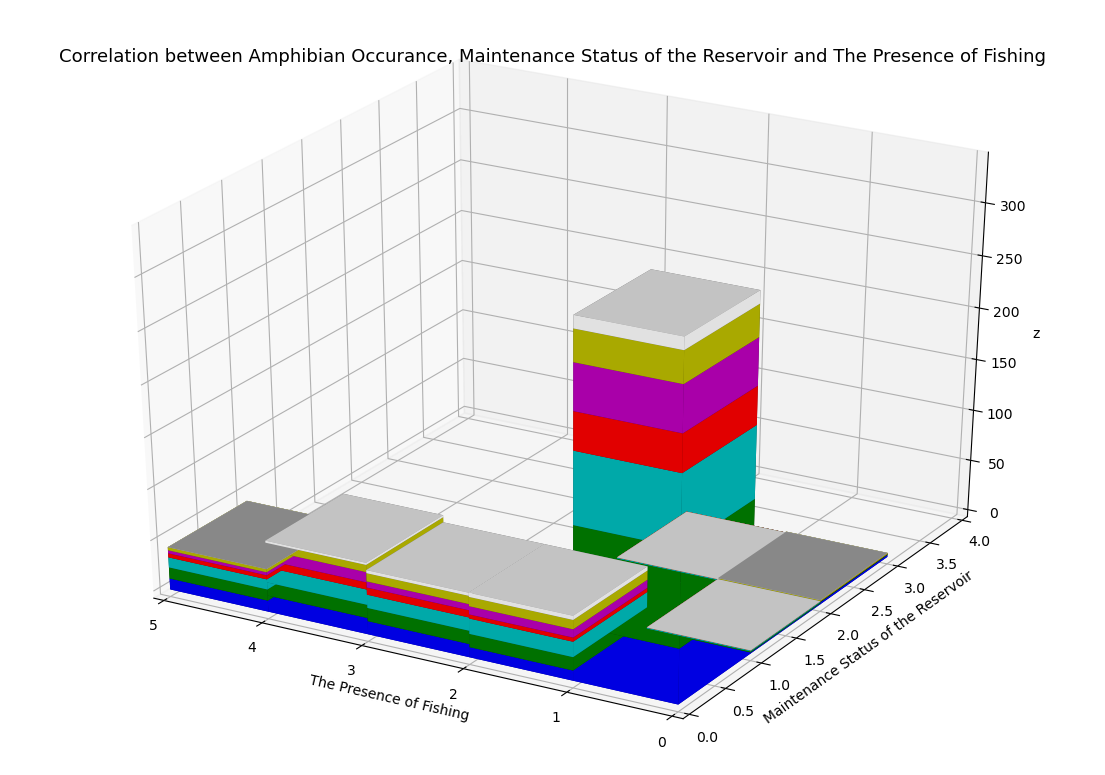

In [188]:
pair = []
xpos = []
ypos =  []
dx = np.ones(9)
dy = np.ones(9)
dz = []
encode = {}


gfCol = (mainDF[amphibian['Green frogs'] == 1])
gfData = (list(gfCol.FR), list(gfCol.MR))

for i in range(len(gfData[0])):
    if(str(gfData[0][i]) + str(gfData[1][i]) not in pair):
        xpos.append(gfData[0][i])
        ypos.append(gfData[1][i])
        pair.append(str(gfData[0][i]) + str(gfData[1][i]))
        encode[str(gfData[0][i]) + str(gfData[1][i])] = len(encode)
        
bfCol = (mainDF[amphibian['Brown frogs'] == 1])
bfData = (list(bfCol.FR), list(bfCol.MR))

for i in range(len(bfData[0])):
    if(str(bfData[0][i]) + str(bfData[1][i]) not in pair):
        xpos.append(bfData[0][i])
        ypos.append(bfData[1][i])
        pair.append(str(bfData[0][i]) + str(bfData[1][i]))
        encode[str(bfData[0][i]) + str(bfData[1][i])] = len(encode)

ctCol = (mainDF[amphibian['Common toad'] == 1])
ctData = (list(ctCol.FR), list(ctCol.MR))

for i in range(len(ctData[0])):
    if(str(ctData[0][i]) + str(ctData[1][i]) not in pair):
        xpos.append(ctData[0][i])
        ypos.append(ctData[1][i])
        pair.append(str(ctData[0][i]) + str(ctData[1][i]))
        encode[str(ctData[0][i]) + str(ctData[1][i])] = len(encode)

ftCol = (mainDF[amphibian['Fire-bellied toad'] == 1])
ftData = (list(ftCol.FR), list(ftCol.MR))

for i in range(len(ftData[0])):
    if(str(ftData[0][i]) + str(ftData[1][i]) not in pair):
        xpos.append(ftData[0][i])
        ypos.append(ftData[1][i])
        pair.append(str(ftData[0][i]) + str(ftData[1][i]))
        encode[str(ftData[0][i]) + str(ftData[1][i])] = len(encode)

tfCol = (mainDF[amphibian['Tree frog'] == 1])
tfData = (list(tfCol.FR), list(tfCol.MR))

for i in range(len(tfData[0])):
    if(str(tfData[0][i]) + str(tfData[1][i]) not in pair):
        xpos.append(tfData[0][i])
        ypos.append(tfData[1][i])
        pair.append(str(tfData[0][i]) + str(tfData[1][i]))
        encode[str(tfData[0][i]) + str(tfData[1][i])] = len(encode)

cnCol = (mainDF[amphibian['Common newt'] == 1])
cnData = (list(cnCol.FR), list(cnCol.MR))

for i in range(len(cnData[0])):
    if(str(cnData[0][i]) + str(cnData[1][i]) not in pair):
        xpos.append(cnData[0][i])
        ypos.append(cnData[1][i])
        pair.append(str(cnData[0][i]) + str(cnData[1][i]))
        encode[str(cnData[0][i]) + str(cnData[1][i])] = len(encode)

gnCol = (mainDF[amphibian['Great crested newt'] == 1])
gnData = (list(gnCol.FR), list(gnCol.MR))

for i in range(len(gnData[0])):
    if(str(gnData[0][i]) + str(gnData[1][i]) not in pair):
        xpos.append(gnData[0][i])
        ypos.append(gnData[1][i])
        pair.append(str(gnData[0][i]) + str(gnData[1][i]))
        encode[str(gnData[0][i]) + str(gnData[1][i])] = len(encode)

data = (gfData, bfData, ctData, ftData, tfData, cnData, gnData)
group = ("Green frog", "Brown frog", "Common toad", "Fire-bellied toad", "Tree frog", "Common newt", "Great crested newt")

zpos = np.zeros(len(xpos))

dx = np.ones(len(xpos))
dy = np.ones(len(xpos))
dz = [np.zeros(len(xpos)) for i in range(7)]

for i in range(len(gfData[0])):
    dz[0][encode[str(gfData[0][i]) + str(gfData[1][i])]] += 1

for i in range(len(bfData[0])):
    dz[1][encode[str(bfData[0][i]) + str(bfData[1][i])]] += 1

for i in range(len(ctData[0])):
    dz[2][encode[str(ctData[0][i]) + str(ctData[1][i])]] += 1

for i in range(len(ftData[0])):
    dz[3][encode[str(ftData[0][i]) + str(ftData[1][i])]] += 1
    
for i in range(len(tfData[0])):
    dz[4][encode[str(tfData[0][i]) + str(tfData[1][i])]] += 1
    
for i in range(len(cnData[0])):
    dz[5][encode[str(cnData[0][i]) + str(cnData[1][i])]] += 1
    
for i in range(len(gnData[0])):
    dz[6][encode[str(gnData[0][i]) + str(gnData[1][i])]] += 1

fig = plt.figure(figsize=(14,10), dpi= 100)
ax = fig.add_subplot(111, projection = "3d")

ax.set_xlabel("x")
ax.set_ylabel("y") 
ax.set_zlabel("z")
ax.set_xlim3d(0,5)
ax.set_ylim3d(0,4) 

_zpos = zpos

for i in range(7):
    ax.bar3d(xpos, ypos, _zpos, dx, dy, dz[i], color=['b', 'g', 'c', 'r', 'm',  'y', 'w'][i])
    _zpos += dz[i]    
    
plt.title('Correlation between Amphibian Occurance, Maintenance Status of the Reservoir and The Presence of Fishing', fontsize = 13)
plt.ylabel('Maintenance Status of the Reservoir', fontsize = 10)
plt.xlabel('The Presence of Fishing', fontsize = 10)
plt.gca().invert_xaxis()
#plt.legend(loc=0)

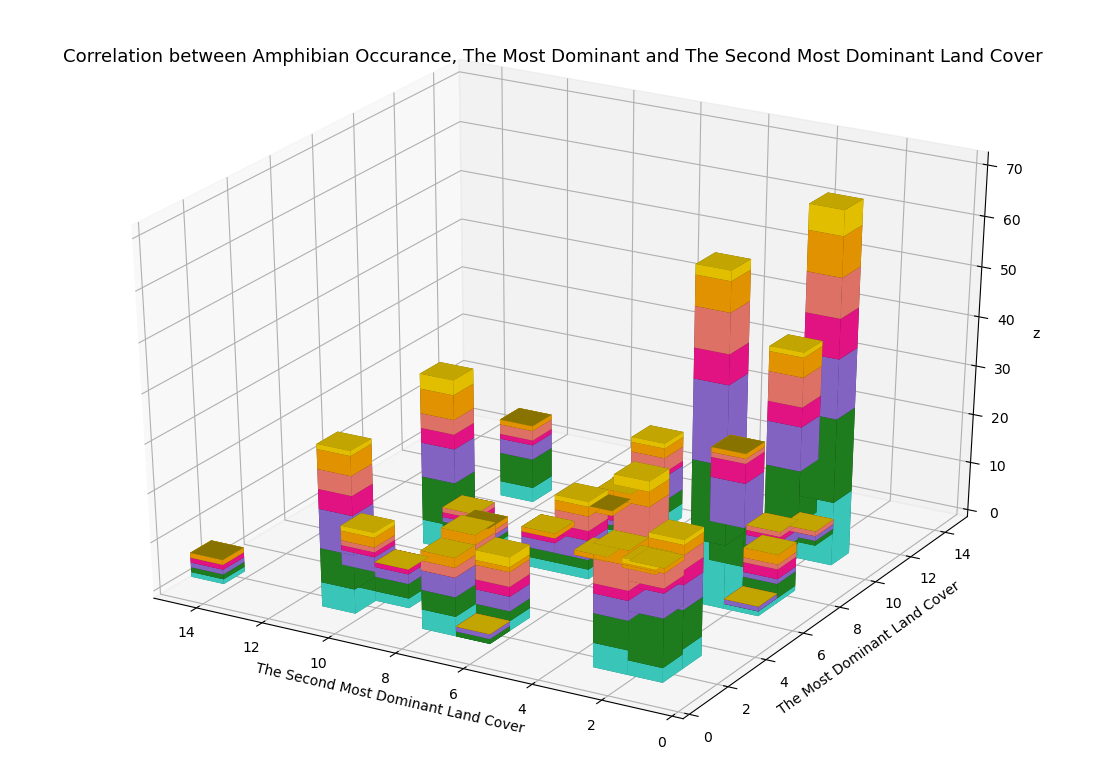

In [180]:
pair = []
xpos = []
ypos =  []
dx = np.ones(9)
dy = np.ones(9)
dz = []
encode = {}


gfCol = (mainDF[amphibian['Green frogs'] == 1])
gfData = (list(gfCol.SUR1), list(gfCol.SUR2))

for i in range(len(gfData[0])):
    if(str(gfData[0][i]) + str(gfData[1][i]) not in pair):
        xpos.append(gfData[0][i])
        ypos.append(gfData[1][i])
        pair.append(str(gfData[0][i]) + str(gfData[1][i]))
        encode[str(gfData[0][i]) + str(gfData[1][i])] = len(encode)
        
bfCol = (mainDF[amphibian['Brown frogs'] == 1])
bfData = (list(bfCol.SUR1), list(bfCol.SUR2))

for i in range(len(bfData[0])):
    if(str(bfData[0][i]) + str(bfData[1][i]) not in pair):
        xpos.append(bfData[0][i])
        ypos.append(bfData[1][i])
        pair.append(str(bfData[0][i]) + str(bfData[1][i]))
        encode[str(bfData[0][i]) + str(bfData[1][i])] = len(encode)

ctCol = (mainDF[amphibian['Common toad'] == 1])
ctData = (list(ctCol.SUR1), list(ctCol.SUR2))

for i in range(len(ctData[0])):
    if(str(ctData[0][i]) + str(ctData[1][i]) not in pair):
        xpos.append(ctData[0][i])
        ypos.append(ctData[1][i])
        pair.append(str(ctData[0][i]) + str(ctData[1][i]))
        encode[str(ctData[0][i]) + str(ctData[1][i])] = len(encode)

ftCol = (mainDF[amphibian['Fire-bellied toad'] == 1])
ftData = (list(ftCol.SUR1), list(ftCol.SUR2))

for i in range(len(ftData[0])):
    if(str(ftData[0][i]) + str(ftData[1][i]) not in pair):
        xpos.append(ftData[0][i])
        ypos.append(ftData[1][i])
        pair.append(str(ftData[0][i]) + str(ftData[1][i]))
        encode[str(ftData[0][i]) + str(ftData[1][i])] = len(encode)

tfCol = (mainDF[amphibian['Tree frog'] == 1])
tfData = (list(tfCol.SUR1), list(tfCol.SUR2))

for i in range(len(tfData[0])):
    if(str(tfData[0][i]) + str(tfData[1][i]) not in pair):
        xpos.append(tfData[0][i])
        ypos.append(tfData[1][i])
        pair.append(str(tfData[0][i]) + str(tfData[1][i]))
        encode[str(tfData[0][i]) + str(tfData[1][i])] = len(encode)

cnCol = (mainDF[amphibian['Common newt'] == 1])
cnData = (list(cnCol.SUR1), list(cnCol.SUR2))

for i in range(len(cnData[0])):
    if(str(cnData[0][i]) + str(cnData[1][i]) not in pair):
        xpos.append(cnData[0][i])
        ypos.append(cnData[1][i])
        pair.append(str(cnData[0][i]) + str(cnData[1][i]))
        encode[str(cnData[0][i]) + str(cnData[1][i])] = len(encode)

gnCol = (mainDF[amphibian['Great crested newt'] == 1])
gnData = (list(gnCol.SUR1), list(gnCol.SUR2))

for i in range(len(gnData[0])):
    if(str(gnData[0][i]) + str(gnData[1][i]) not in pair):
        xpos.append(gnData[0][i])
        ypos.append(gnData[1][i])
        pair.append(str(gnData[0][i]) + str(gnData[1][i]))
        encode[str(gnData[0][i]) + str(gnData[1][i])] = len(encode)

data = (gfData, bfData, ctData, ftData, tfData, cnData, gnData)
group = ("Green frog", "Brown frog", "Common toad", "Fire-bellied toad", "Tree frog", "Common newt", "Great crested newt")

zpos = np.zeros(len(xpos))

dx = np.ones(len(xpos))
dy = np.ones(len(xpos))
dz = [np.zeros(len(xpos)) for i in range(7)]

for i in range(len(gfData[0])):
    dz[0][encode[str(gfData[0][i]) + str(gfData[1][i])]] += 1

for i in range(len(bfData[0])):
    dz[1][encode[str(bfData[0][i]) + str(bfData[1][i])]] += 1

for i in range(len(ctData[0])):
    dz[2][encode[str(ctData[0][i]) + str(ctData[1][i])]] += 1

for i in range(len(ftData[0])):
    dz[3][encode[str(ftData[0][i]) + str(ftData[1][i])]] += 1
    
for i in range(len(tfData[0])):
    dz[4][encode[str(tfData[0][i]) + str(tfData[1][i])]] += 1
    
for i in range(len(cnData[0])):
    dz[5][encode[str(cnData[0][i]) + str(cnData[1][i])]] += 1
    
for i in range(len(gnData[0])):
    dz[6][encode[str(gnData[0][i]) + str(gnData[1][i])]] += 1

fig = plt.figure(figsize=(14,10), dpi= 100)
ax = fig.add_subplot(111, projection = "3d")

ax.set_xlabel("x")
ax.set_ylabel("y") 
ax.set_zlabel("z")
ax.set_xlim3d(0,15)
ax.set_ylim3d(0,15) 

_zpos = zpos

for i in range(7):
    ax.bar3d(xpos, ypos, _zpos, dx, dy, dz[i], color=colorMap[i])
    _zpos += dz[i]    
    
plt.title('Correlation between Amphibian Occurance, The Most Dominant and The Second Most Dominant Land Cover', fontsize = 13)
plt.ylabel('The Most Dominant Land Cover', fontsize = 10)
plt.xlabel('The Second Most Dominant Land Cover', fontsize = 10)
plt.gca().invert_xaxis()
#plt.legend(loc=0)